In [1]:
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Success

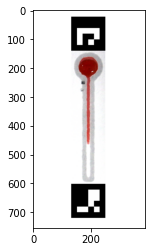

In [180]:
#read image
filename = 'design8.png'
bgr = cv2.imread(filename)
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(bgr,cv2.COLOR_BGR2HSV)
hls=cv2.cvtColor(bgr,cv2.COLOR_BGR2HLS)
plt.imshow(rgb)

# Other stuff

(<matplotlib.axes._subplots.AxesSubplot at 0x7fcddec40d30>,
 <matplotlib.image.AxesImage at 0x7fcddebd6e80>)

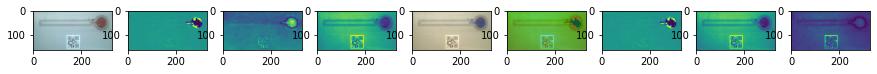

In [104]:
plt.figure(figsize=(15,15))
i = 9
plt.subplot(1,i,1),plt.imshow(rgb)
plt.subplot(1,i,2),plt.imshow(hsv[:,:,0])
plt.subplot(1,i,3),plt.imshow(hsv[:,:,1])
plt.subplot(1,i,4),plt.imshow(hsv[:,:,2])
plt.subplot(1,i,5),plt.imshow(bgr)
plt.subplot(1,i,6),plt.imshow(hls)
plt.subplot(1,i,7),plt.imshow(hls[:,:,0])
plt.subplot(1,i,8),plt.imshow(hls[:,:,1])
plt.subplot(1,i,9),plt.imshow(hls[:,:,2])

In [185]:
def KMeansSeg(bgr, k):
    '''
        Carry out k-means clustering segmentation on image
        Args:
            img(ndarray): a numpy image
            k(int): number of cluseters/segments desired
        Returns:
            seg_img(ndarray): a segmented image
    '''
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
    img = hsv[:, :, 1]
    if len(img.shape) > 2:
        vectorized = img.reshape((-1, 3))
    else:
        vectorized = img.reshape((-1, 1))
    vectorized = np.float32(vectorized)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = k
    attempts = 10
    ret, label, center = cv2.kmeans(
        vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    seg_img = res.reshape((img.shape))
    return seg_img

In [215]:
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
img = hsv[:, :, 1]
if len(img.shape) > 2:
    vectorized = img.reshape((-1, 3))
else:
    vectorized = img.reshape((-1, 1))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts = 10
ret, label, center = cv2.kmeans(
    vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
seg_img = res.reshape((img.shape))

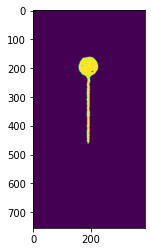

In [216]:
plt.imshow(seg_img)

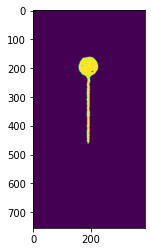

In [218]:
top_sat = max(center)
top_sat_flags = center==top_sat
pallete = np.array([[0]]*2)
pallete[top_sat_flags] = center[top_sat_flags]
res = pallete[label.flatten()]
seg_img = res.reshape((img.shape))
plt.imshow(seg_img)

In [190]:
def find_contour(bgr):
    '''
        Return biggest contour from BGR image
        Args:
            bgr(ndarray): BGR image
        Returns:
            max_area_cnt(List(ndarray)): Biggest contour detected
    '''
    seg_img = KMeansSeg(bgr, 3)
    seg_img = cv2.Canny(seg_img, 50, 100)
    cnts, hier = cv2.findContours(seg_img, cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_SIMPLE)
    area_cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    if len(area_cnts) > 0:
        max_area_cnt = area_cnts[0]
    else:
        max_area_cnt = None
    return max_area_cnt

In [193]:
max_area_cnt = find_contour(bgr)
max_area_cnt

array([[[190, 161]],

       [[189, 162]],

       [[183, 162]],

       [[182, 163]],

       [[176, 163]],

       [[175, 164]],

       [[174, 164]],

       [[172, 166]],

       [[171, 166]],

       [[166, 171]],

       [[166, 172]],

       [[165, 173]],

       [[165, 174]],

       [[162, 177]],

       [[162, 178]],

       [[161, 179]],

       [[161, 180]],

       [[160, 181]],

       [[160, 184]],

       [[159, 185]],

       [[159, 186]],

       [[158, 187]],

       [[158, 190]],

       [[157, 191]],

       [[157, 192]],

       [[156, 193]],

       [[156, 198]],

       [[157, 199]],

       [[157, 200]],

       [[158, 201]],

       [[158, 206]],

       [[159, 207]],

       [[159, 209]],

       [[160, 210]],

       [[160, 212]],

       [[162, 214]],

       [[162, 215]],

       [[163, 215]],

       [[166, 218]],

       [[166, 219]],

       [[168, 221]],

       [[168, 222]],

       [[170, 224]],

       [[173, 224]],

       [[174, 225]],

       [[1

In [ ]:
m